# Project 2: In-Depth Exploratory Data Analysis (EDA)
## Netflix Content Analysis 🎬

**Project Objective:** To perform an in-depth exploratory data analysis of the Netflix dataset. We will explore trends in content production, identify popular genres, analyze content ratings, and understand the distribution of movies and TV shows on the platform. This project builds on foundational EDA by introducing time-series analysis and more complex data cleaning and transformation techniques.

**Class Duration:** 2.5 hours

### Core Concepts We'll Cover:
1.  **Data Cleaning & Transformation:** Handling missing values and converting data types (especially dates).
2.  **Time-Series Analysis:** Analyzing how content has been added to Netflix over the years.
3.  **Text Data Manipulation:** Parsing and analyzing columns with multiple values, like `listed_in` (genres) and `cast`.
4.  **Geographical & Rating Analysis:** Understanding where content comes from and its maturity level.
5.  **Feature Engineering:** Creating new, insightful features like 'content age'.
6.  **Advanced Visualization:** Creating insightful plots to understand distributions and relationships in the data.

### Step 1: Setup - Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style("darkgrid")

### Step 2: Data Loading and Initial Inspection

In [26]:
netflix_df = pd.read_csv("netflix_titles.csv")

In [27]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#### Finding basic inssites from the data with the help of .shape,.info() and .describe()

In [28]:
netflix_df.shape

(7787, 12)

In [29]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [30]:
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


#####  Useful Insites

* Dataset has 7787 rows and 12 columns
* The "date_added"  is a obj data type to perform analysis we need to change it to datetime formate
* Columns "director", "cast", "country", "date_added", and "rating" all have null values.
* "director", "cast" and "country" have the maximum nummber of null values

### Step 3: Data Cleaning and Transformation

This step is critical for ensuring our analysis is accurate. We will handle missing values and correct data types.

In [31]:
#Check null values
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

#### Dealing with missing values

In [32]:
#Filling "director" and "cast" missing values with "Unknown" as there is plenty of null values for these two columns and categories as well
netflix_df["director"] = netflix_df["director"].fillna("Unknown")
netflix_df["cast"] = netflix_df["cast"].fillna("Unknown")

In [33]:
netflix_df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [34]:
#Filling "country" column with mode data of it, as we there is less number of categories as compared to "director" and "country" columns
mode_country = netflix_df["country"].mode()[0]
netflix_df["country"] = netflix_df["country"].fillna(mode_country)

In [35]:
netflix_df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [36]:
#Removing null values for "date_added" and "rating", as these are very few values as compared to our original dataset
netflix_df.dropna(subset=["date_added","rating"], inplace = True)

In [37]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

* Now the dataset is clean and does not contain any null values

#### Data Transformation

In [38]:
# Transforming "date_added" column datatype from obj(strinng) to datetime
netflix_df["date_added"] = pd.to_datetime(netflix_df["date_added"], format = "mixed", dayfirst = False)

* **format="mixed":** This argument tells pandas to infer the date format automatically. This is helpful when the date strings in the column have different formats.

* **dayfirst=False:** This argument specifies that when the date format is ambiguous (e.g., 01/02/2023), it should be interpreted as month first (January 2nd) rather than day first (February 1st).

In [39]:
netflix_df["date_added"]

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7770, dtype: datetime64[ns]

In [40]:
netflix_df["year_added"] = netflix_df["date_added"].dt.year

In [41]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [42]:
netflix_df["month_added"] = netflix_df["date_added"].dt.month

In [43]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [44]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  year_added    7770 non-null   int32         
 13  month_added   7770 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 849.8+ KB


* Now there is no null values and the datatype is also in the way we want

### Step 4: Exploratory Data Analysis and Visulization

##### 4.1 What is the distribution of content type?

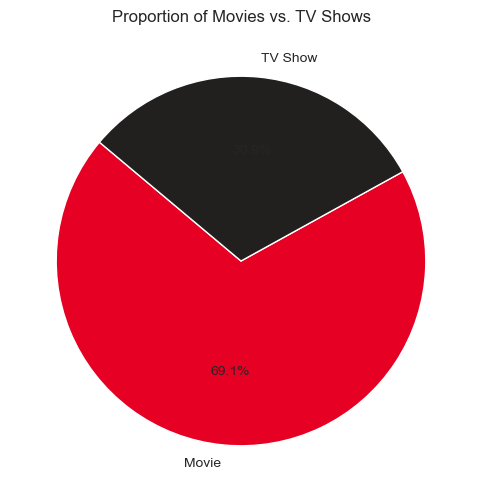

In [45]:
plt.figure(figsize=(8, 6))
type_counts = netflix_df["type"].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct="%1.1f%%", startangle=140, colors=["#e60023", "#221f1f"])
plt.title("Proportion of Movies vs. TV Shows")
plt.ylabel("")
plt.show()

#### 4.2 How has content been added over time?

<Figure size 1400x800 with 0 Axes>

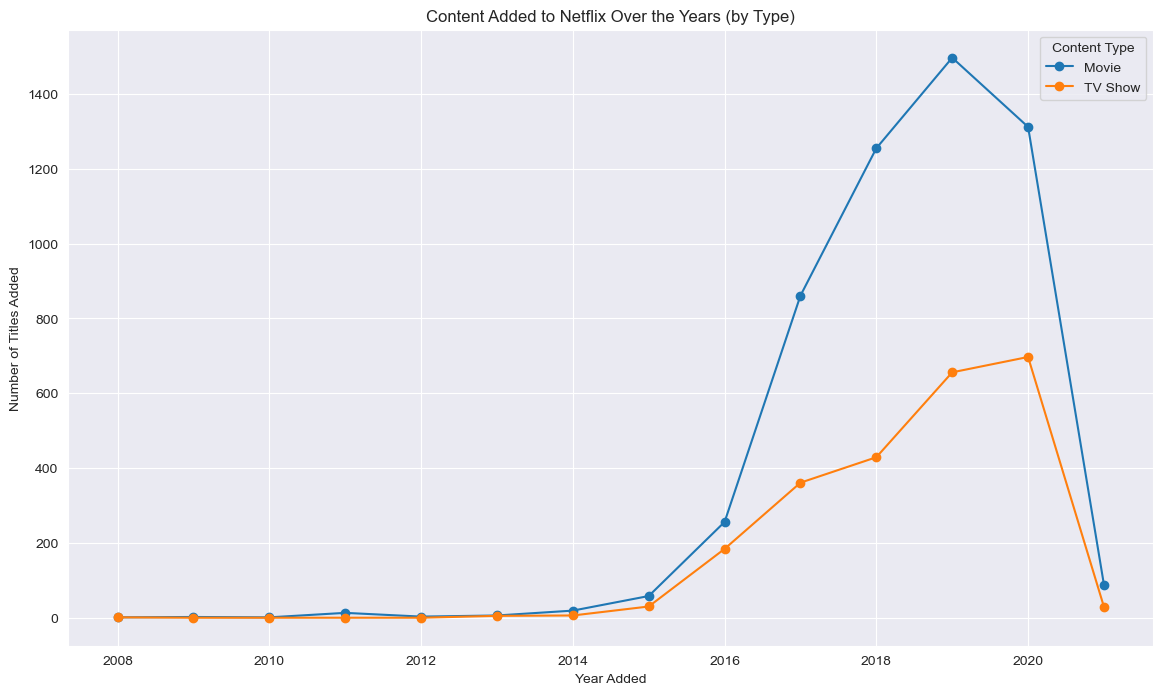

In [46]:
# Group data by year and content type
content_over_time = netflix_df.groupby(["year_added", "type"]).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind="line", marker="o", figsize=(14, 8))
plt.title("Content Added to Netflix Over the Years (by Type)")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.legend(title="Content Type")
plt.grid(True)
plt.show()

**Insight:** By separating movies and TV shows, we can see that while both grew significantly, the addition of movies accelerated much more dramatically, peaking in 2019. The growth in TV shows has been more steady. There appears to be a slight slowdown in content additions in 2020 and 2021, which could be due to the COVID-19 pandemic affecting productions or the dataset being incomplete for the latest year.

#### 4.3 What are the most popular genres?

In [47]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


#### **Theoretical Concept: Handling Multi-Value Text Columns**
The `listed_in` column contains strings with multiple genres separated by commas (e.g., "Dramas, International Movies"). To analyze each genre individually, we need to transform the data. A common technique is to:
1.  **Split** the string in each row into a list of genres.
2.  **Explode** the DataFrame so that each genre in the list gets its own row, duplicating the other information for that title.
This allows us to perform a `value_counts()` on the genres.

In [48]:
# Split the "listed_in" column and explode it
genres = netflix_df.assign(genre=netflix_df["listed_in"].str.split(", ")).explode("genre")

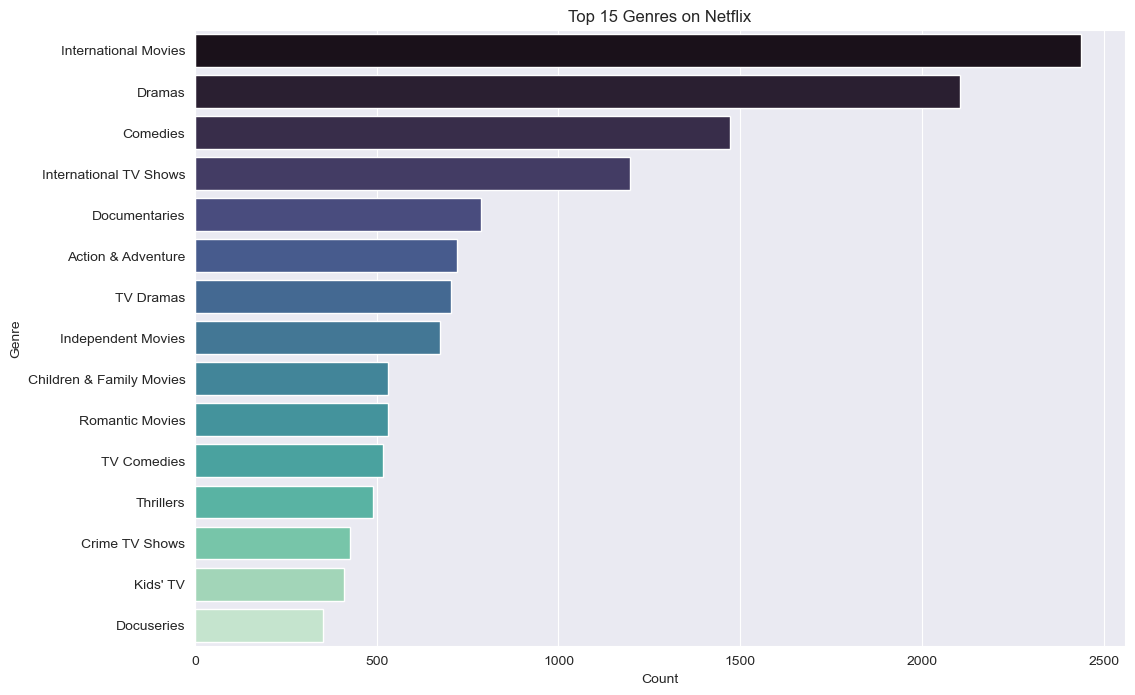

In [49]:
# Get the top 15 genres and their counts
top_genres_counts = genres["genre"].value_counts().reset_index()
#Renaming column
top_genres_counts.columns = ["genre", "count"]

# Select only the top 15 for plotting
top_15 = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y="genre", x="count", data=top_15, palette="mako", hue="genre", legend=False)
plt.title("Top 15 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

**Insight:** "International Movies" is the most common genre tag, highlighting Netflix"s global content strategy. This is followed by Dramas, Comedies, and Action & Adventure.

#### 4.4 What is the distribution of content duration?

In [50]:
# Separate movies and TV shows
movies_df = netflix_df[netflix_df["type"] == "Movie"].copy()
tv_shows_df = netflix_df[netflix_df["type"] == "TV Show"].copy()

In [51]:
# Clean and convert duration for movies
movies_df["duration_min"] = movies_df["duration"].str.replace(" min", "").astype(int)

# Clean and convert duration for TV shows
tv_shows_df["seasons"] = tv_shows_df["duration"].str.replace(" Seasons", "").str.replace(" Season", "").astype(int)

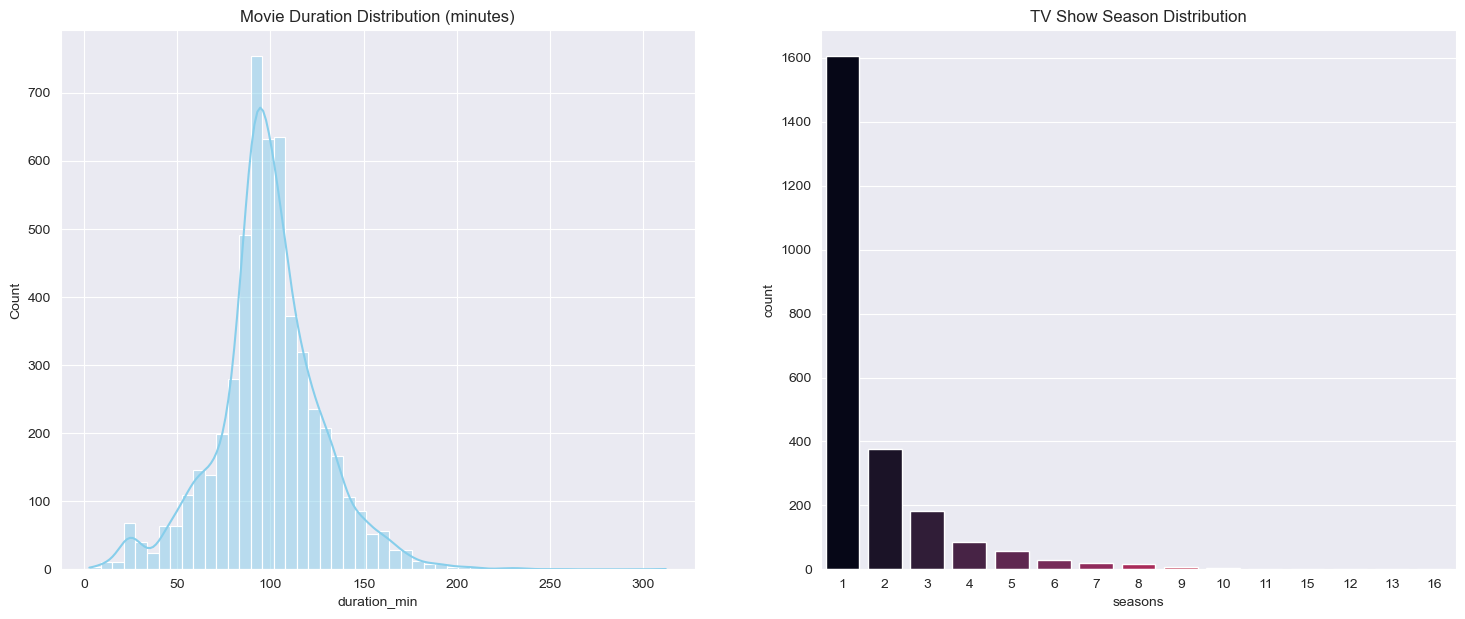

In [52]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x="duration_min", bins=50, kde=True, color="skyblue").set_title("Movie Duration Distribution (minutes)")

# TV Show Season Distribution
sns.countplot(ax=axes[1], x="seasons", data=tv_shows_df, palette="rocket", order=tv_shows_df["seasons"].value_counts().index, hue="seasons", legend=False).set_title("TV Show Season Distribution")

plt.show()

**Insight:**
- The majority of movies on Netflix are between 80 and 120 minutes long, which is standard for feature films.
- The vast majority of TV shows on Netflix are short-lived, with most having only 1 season. This could reflect a strategy of producing many pilots and only renewing the most successful ones, or a focus on limited series.

#### 4.5 Where does the content come from? (Geographical Analysis)

In [53]:
netflix_df["country"]

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                        United States
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7770, dtype: object

In [54]:
countries = netflix_df.assign(country=netflix_df["country"].str.split(", ")).explode("country")
top_countries_counts = countries["country"].value_counts().reset_index()
top_countries_counts.columns = ["country", "count"] # Rename columns for clarity

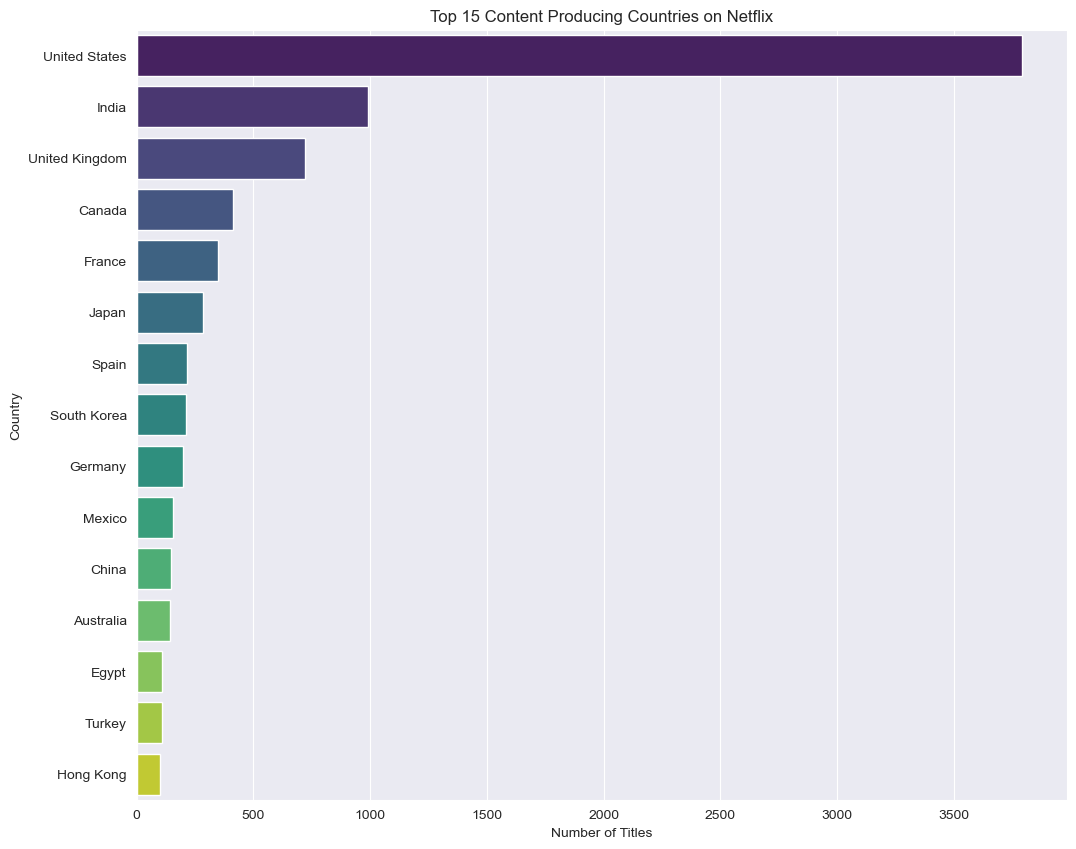

In [55]:
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y="country", x="count", data=top_countries_counts_plot, palette="viridis", hue="country", legend=False)
plt.title("Top 15 Content Producing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

**Insight:** The United States is by far the largest producer of content available on Netflix. However, India is a very strong second, which explains why so many of the top actors were from India. The UK, Japan, and South Korea also represent major content markets for the platform, emphasizing its global nature.

#### 4.6 What are the maturity ratings of the content?

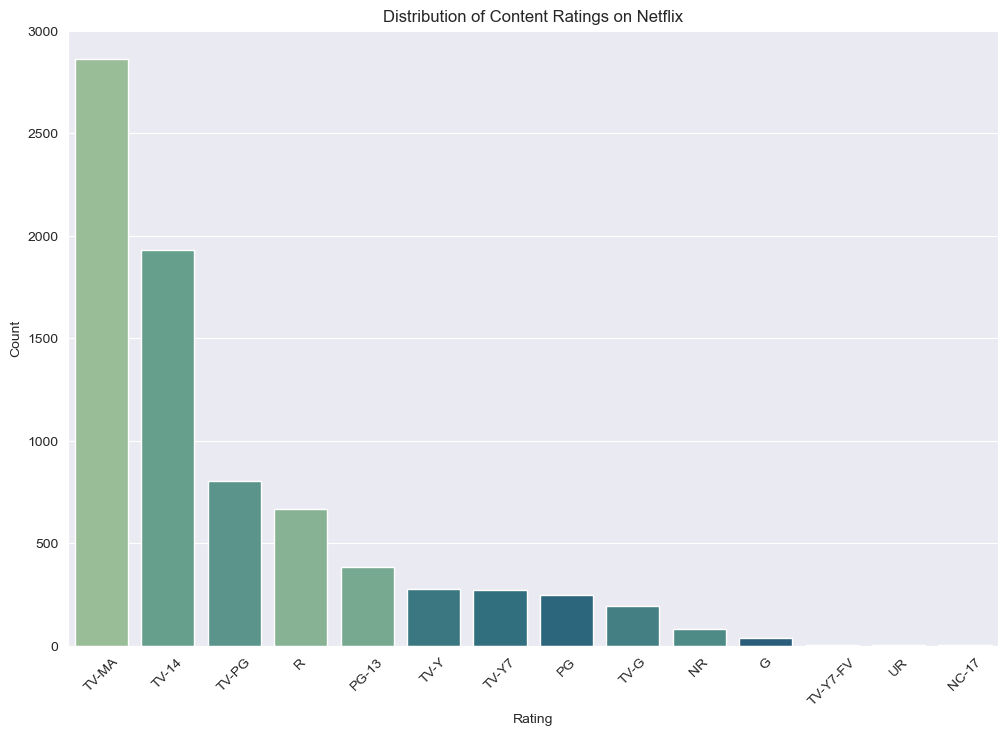

In [57]:
plt.figure(figsize=(12, 8))
sns.countplot(x="rating", data=netflix_df, order=netflix_df["rating"].value_counts().index, palette="crest", hue="rating", legend=False)
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Insight:** A large portion of Netflix"s content is aimed at mature audiences, with `TV-MA` (Mature Audience) and `TV-14` (Parents Strongly Cautioned) being the two most common ratings. This suggests a focus on adult viewers over content for children (`TV-G`, `TV-Y`).

### Step 5: Feature Engineering - Content Freshness
Let"s create a new feature to analyze how old content is when it gets added to Netflix. This can tell us about their acquisition strategy (buying old classics vs. releasing new originals).

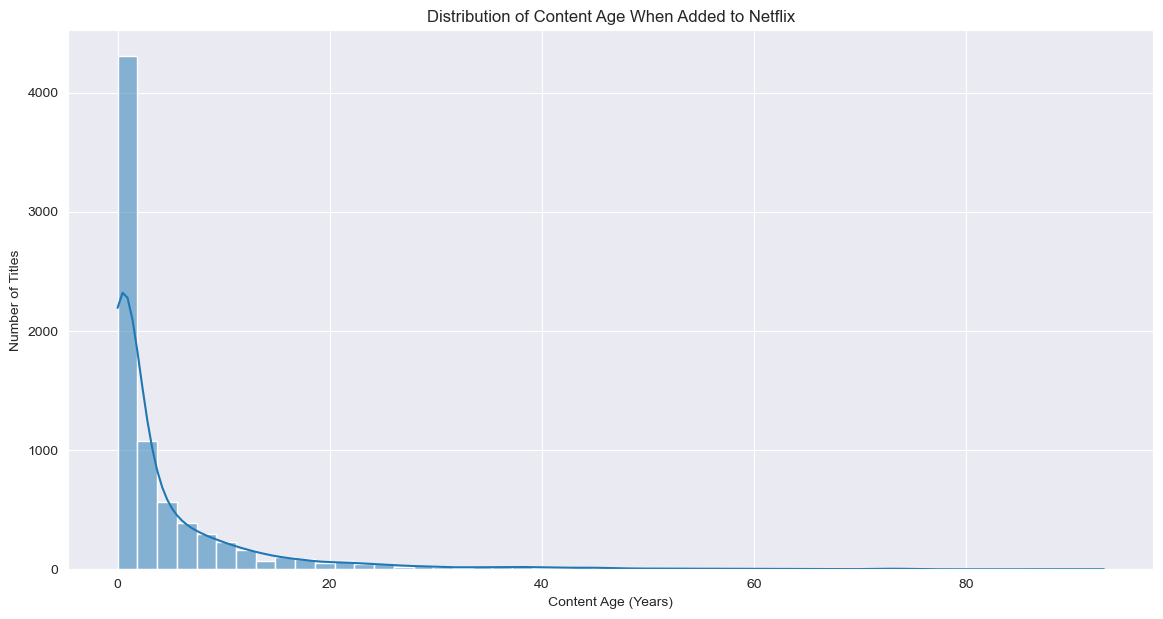

In [58]:
netflix_df["age_on_netflix"] = netflix_df["year_added"]-netflix_df["release_year"]
content_age = netflix_df[netflix_df["age_on_netflix"] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x="age_on_netflix", bins=50, kde=True)
plt.title("Distribution of Content Age When Added to Netflix")
plt.xlabel("Content Age (Years)")
plt.ylabel("Number of Titles")
plt.show()

**Insight:** The large spike at `0` indicates that a significant amount of content is added in the same year it"s released, which is characteristic of "Netflix Originals." However, there is a very long tail, showing that Netflix also heavily invests in acquiring licensed content that can be decades old, building a deep library of classic films and shows.

### Step 6: Deeper Multivariate Analysis

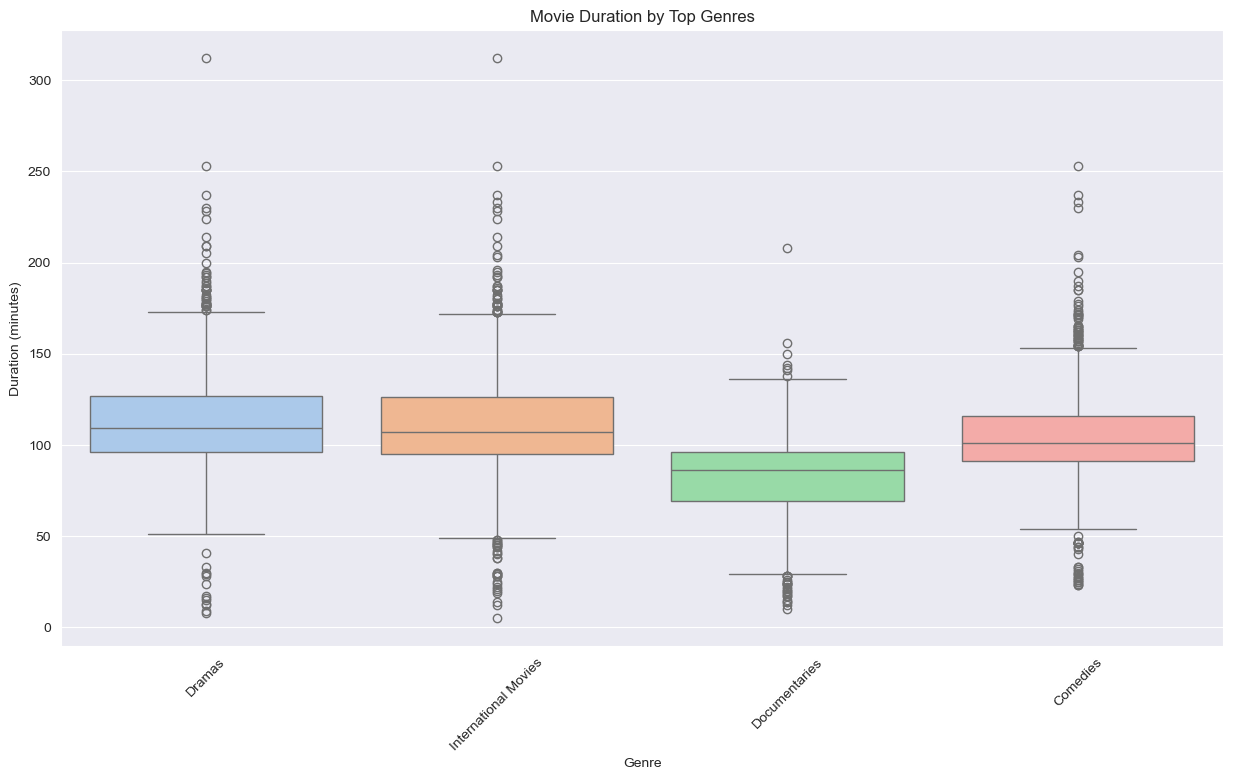

In [59]:
# Analyze movie duration across different top genres
top_genres = genres["genre"].value_counts().index[:5]
genres_movies = genres[(genres["type"] == "Movie") & (genres["genre"].isin(top_genres))].copy()
genres_movies["duration_min"] = genres_movies["duration"].str.replace(" min", "").astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x="genre", y="duration_min", palette="pastel", hue="genre", legend=False)
plt.title("Movie Duration by Top Genres")
plt.xlabel("Genre")
plt.ylabel("Duration (minutes)")
plt.xticks(rotation=45)
plt.show()

**Insight:** While the median duration for most top genres is similar (around 90-100 minutes), we can see some interesting variations. For example, Dramas tend to have a wider range of durations, with many longer films. International Movies also show a broad distribution, reflecting diverse filmmaking styles from around the world.

### Step 7: Word Cloud from Content Descriptions
As a final visual analysis er aare generating a word cloud from the `description` column to see what themes and words are most common in Netflix content.

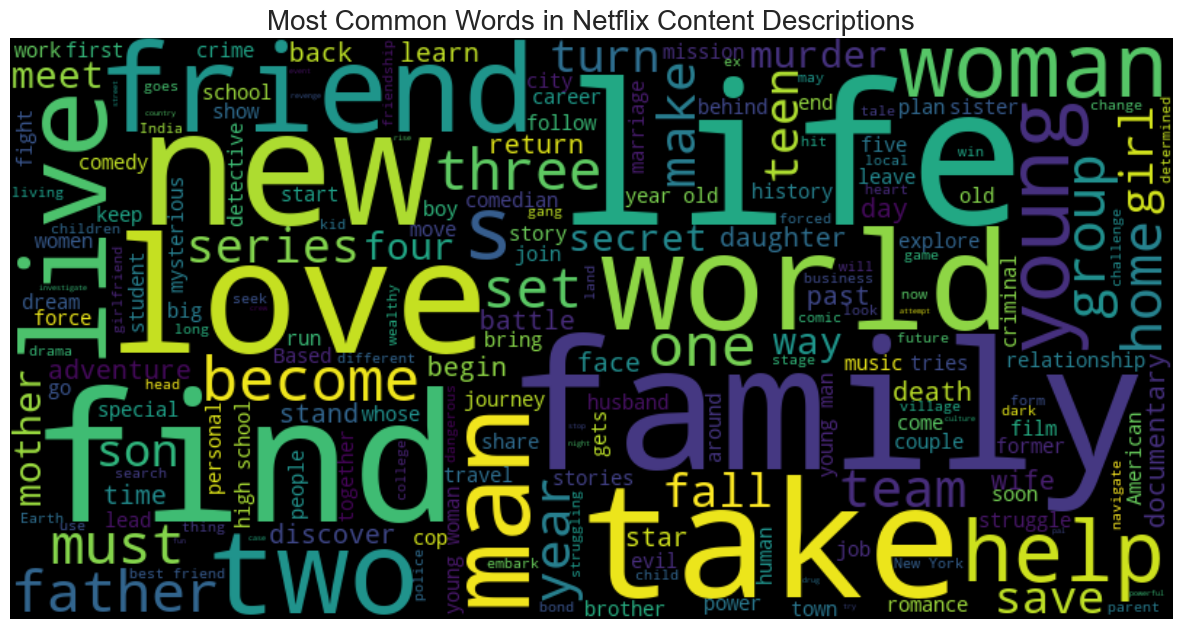

In [60]:
# Combine all descriptions into a single string
text = " ".join(netflix_df["description"])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Netflix Content Descriptions", fontsize=20)
plt.show()

**Insight:** The word cloud highlights common themes and subjects. Words like "life," "family," "love," "young," "friends," and "world" are prominent, suggesting that much of the content revolves around human relationships and personal journeys. Action-oriented words like "find," "secret," and "new" also appear frequently.

### Step 8: Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform"s content library.

**Key Findings:**
1. **Content Strategy:** Netflix"s library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.
2. **Global Dominance:** While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.
3. **Target Audience:** The content library is skewed towards mature audiences, with `TV-MA` and `TV-14` being the most common ratings.
4. **Content Format & Genre:** Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.
5. **Common Themes:** Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.

**Limitations:** This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the *supply* of content, not its *demand* or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.

# Submission Q"s

## 1 How has the distribution of content ratings changed over time?

<Figure size 1400x800 with 0 Axes>

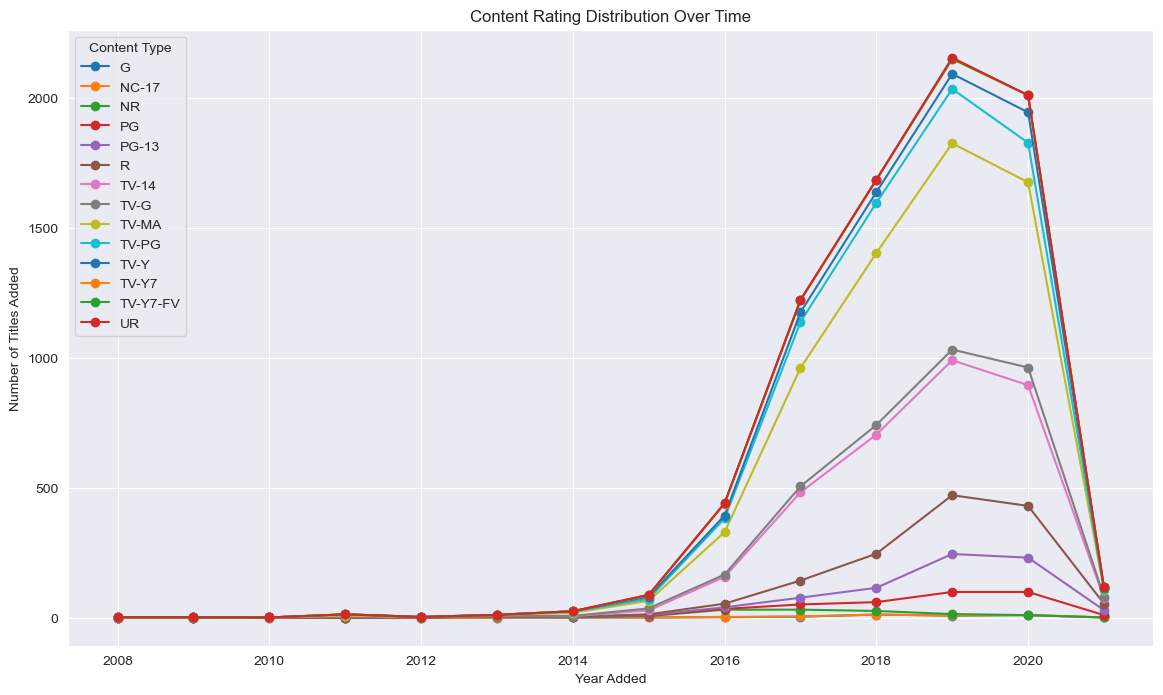

In [61]:
#Content rating overtime wrt movies added on Netflix
content_rating_over_time = netflix_df.groupby(["year_added","rating"]).size().unstack().fillna(0)

plt.figure(figsize=(14,8))
content_rating_over_time.plot(kind="line",marker="o",stacked = True ,figsize=(14, 8))
plt.title("Content Rating Distribution Over Time")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.legend(title="Content Type")
plt.grid(True)
plt.show()

**Insight:**
* TV-MA, TV-14, and TV-PG are the most dominant categories, showing that Netflix’s catalog is heavily skewed toward mature and teenage audiences.
* Kids categories (TV-Y, TV-Y7, TV-Y7-FV, TV-G) remain present but relatively small compared to adult ratings.

## Q2 Is there a relationship between content age and its type (Movie vs. TV Show)?

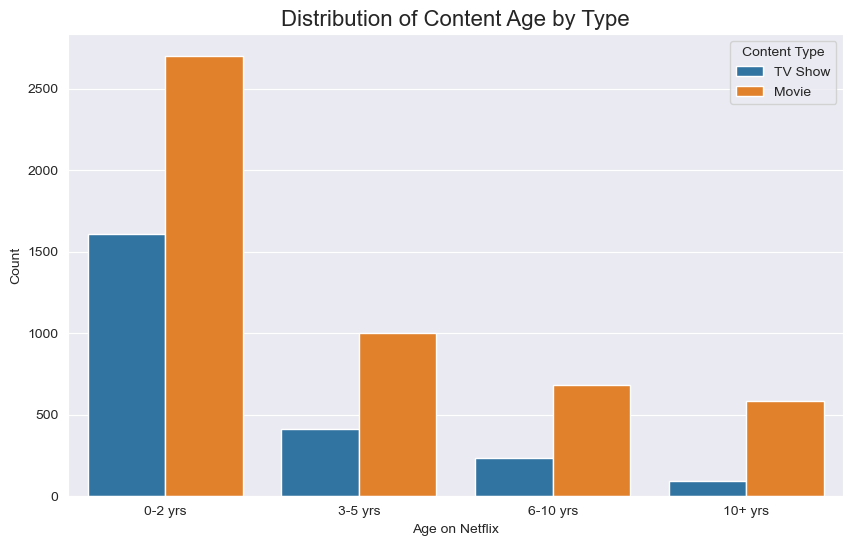

In [62]:
# Bin the 'age_on_netflix'
bins = [0, 2, 5, 10, 20]
labels = ["0-2 yrs", "3-5 yrs", "6-10 yrs", "10+ yrs"]

#Creating a new columns for age distribution
netflix_df["age_bin"] = pd.cut(netflix_df["age_on_netflix"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
sns.countplot(data=netflix_df, x="age_bin", hue="type")

plt.title("Distribution of Content Age by Type", fontsize=16)
plt.xlabel("Age on Netflix")
plt.ylabel("Count")
plt.legend(title="Content Type")
plt.show()


**Insight:**

* Movies dominate across all age groups – Netflix maintains both new and old movies, giving a wide spread of content age.
* TV Shows are mostly recent (0–2 years) – very few shows are older than 5 years, showing Netflix’s focus on fresh series.
* Different strategies – Movies are kept for long-term library value, while TV Shows are refreshed more frequently.

## Q3. Can we identify any trends in content production based on the release year vs. the year added to Netflix?

* **size** : Bubble increases its size according to "size" variable.
* **alpha** : It helps to give a transparent look with respect to size increases

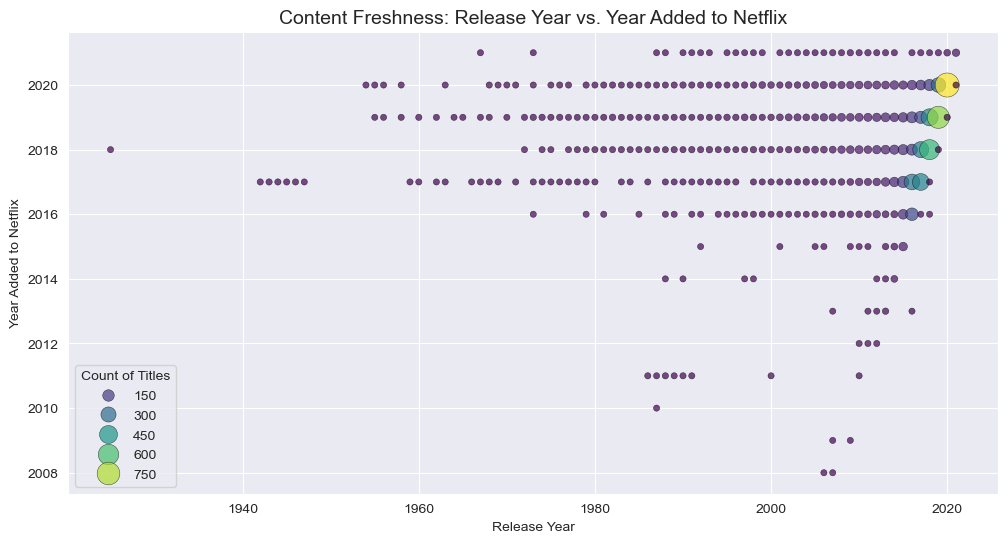

In [63]:
content_freshness = netflix_df.groupby(["release_year", "year_added"]).size().reset_index(name="count")

plt.figure(figsize=(12,6))
sns.scatterplot(data=content_freshness,x="release_year",y="year_added",size="count",hue="count",palette="viridis",sizes=(20, 300),alpha=0.7,
edgecolor="k")
plt.title("Content Freshness: Release Year vs. Year Added to Netflix", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Year Added to Netflix")
plt.legend(title="Count of Titles")
plt.show()


**Insites** 
* This shows that previously Netflix tries to aquire the old movies and releaase it on their platform.
* As soon as OTT platform gets populaarity arount 2019-2020 during pandamic, it uses to product Netflix Originaals and also collabrate with movies to release on the Platform as soon as possible
* The freshness of the content increases graduly in receent years correct grammer and modify if anyting is wrong

## Q4. What are the most common word pairs or phrases in content descriptions?

In [72]:
from sklearn.feature_extraction.text import CountVectorizer


descriptions = netflix_df['description'].dropna().tolist()  # Drop missing values and convert to list

# Initialize CountVectorizer for bigrams
vectorizer = CountVectorizer(
    ngram_range=(2, 2),     # Extract bigrams (word pairs)
    min_df=1,               # Only include bigrams that appear in at least 1 document
    stop_words='english'    # Remove common English stop words
)

# Fit and transform the descriptions
bigram_matrix = vectorizer.fit_transform(descriptions)

# Get bigram feature names
bigram_features = vectorizer.get_feature_names_out()

# Sum the counts of each bigram across all documents
bigram_counts = bigram_matrix.toarray().sum(axis=0)

# Create DataFrame to organize and sort bigrams by frequency
bigram_df = pd.DataFrame({'bigram': bigram_features,'count': bigram_counts}).sort_values(by='count', ascending=False).reset_index(drop=True)

bigram_df.head(15)


,bigram,count
0,high school,133
1,year old,130
2,young man,103
3,young woman,98
4,new york,86
5,small town,59
6,best friend,51
7,true story,48
8,stand special,47
9,world war,46


## Q5. Who are the top directors on Netflix?

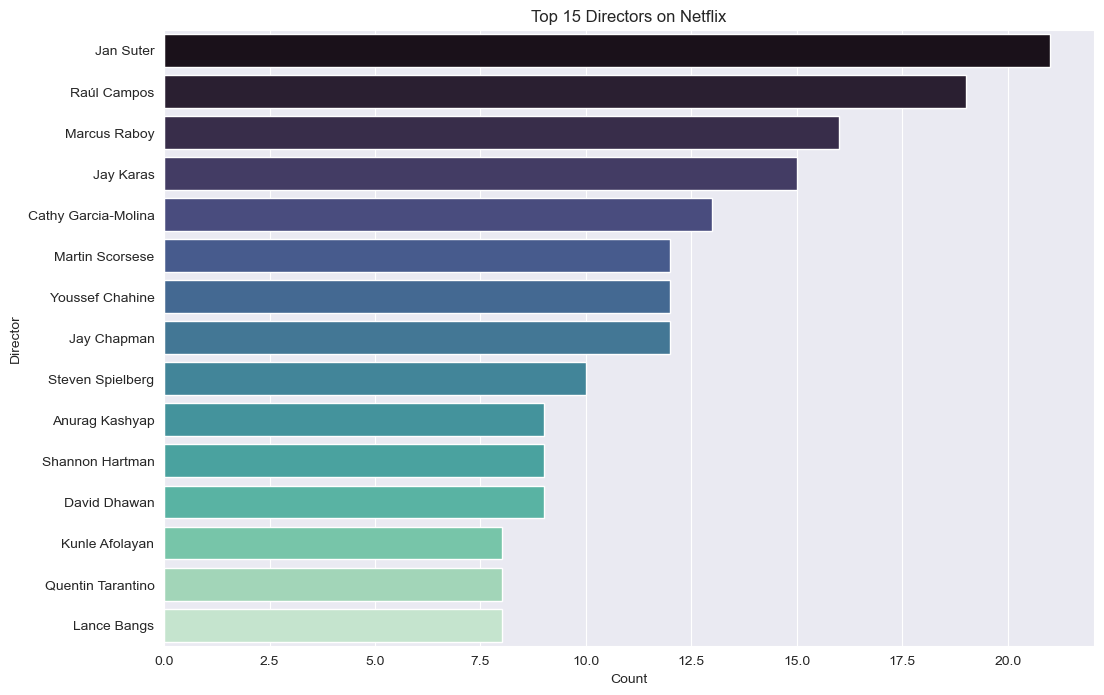

In [89]:
directors = netflix_df.assign(director=netflix_df["director"].str.split(", ")).explode("director")

#Removing unknown from the directors list
directors_filtered = directors[directors["director"] != "Unknown"]["director"]
netflix_top_director = directors_filtered.value_counts().reset_index()
netflix_top_director.columns = ["director", "count"]

top_15 = netflix_top_director.head(15)


plt.figure(figsize=(12, 8))
sns.barplot(y="director", x="count", data=top_15, palette="mako", hue="director", legend=False)
plt.title("Top 15 Directors on Netflix")
plt.xlabel("Count")
plt.ylabel("Director")
plt.show()

**Insites**
* Most of the director colums are blank and filled as Unknown which has been removed to find actual directors list
* "Jan Suter", "Raul Compos", "Marcus Raboy" are the top directors.